О ДАТАСЕТЕ:

-  Этот набор данных предоставляет ценную информацию о покупательских привычках, транзакциях и многом другом клиентов. 

О столбцах:

Customer ID: уникальные идентификаторы для каждого клиента.
Name: имя.
Surname: фамилия.
Gender: пол.
Birthdate: дата рождения.
Transaction Amount: сумма каждой транзакции.
Date: дата транзакции.
Merchant Name: имя продавца.
Category: категория.

1. Импортируем библиотеки и получаем данные

In [44]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
df = pd.read_csv('credit_card_transaction_flow.csv')
print('Import Successful')
df.sample(5)

Import Successful


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
39847,303139,Sean,Goodwin,M,24-10-1984,384.27,31-01-2023,"Phillips, Joyce and Thomas",Electronics
36610,378107,Crystal,Watkins,F,29-10-1964,59.14,04-03-2023,Cooley LLC,Cosmetic
35816,169111,Jimmy,Campbell,NaN,01-11-1954,858.88,31-08-2023,Conrad PLC,Travel
40346,806066,Roger,Wilson,M,01-11-1953,"1,491.53",17-01-2023,Carpenter-Ferguson,Travel
17838,699998,Lisa,Adams,NaN,25-10-1980,20.42,21-09-2023,Hall Inc,Cosmetic


2. изучаем размерность, информацию, описание и тд датасета.

In [16]:
df.shape

(50000, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [18]:
df.describe()

,Customer ID,Transaction Amount
count,"50,000.00","50,000.00"
mean,"500,136.80",442.12
std,"288,232.43",631.67
min,29.00,5.01
25%,"251,191.50",79.01
50%,"499,520.50",182.19
75%,"749,854.25",470.51
max,"999,997.00","2,999.88"


3. Проверяем отсутствие пропущенных значений и определяем способ их обработки: путем замены или удаления.
- мы обнаружили пропуски в столбце пол
- найдем среднее значение транзакций для каждого пола
- далее в датасете на место пропусков вставляем ближайщие средние значения

In [19]:
df.isnull().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [20]:
average_transaction_amount_by_gender = df.groupby('Gender')['Transaction Amount'].mean()
print("average_transaction_amount_by_gender")
print(average_transaction_amount_by_gender)

average_transaction_amount_by_gender
Gender
F   445.52
M   440.42
Name: Transaction Amount, dtype: float64


In [21]:
for index, row in df[df['Gender'].isnull()].iterrows(): 
    tansaction_amount = row['Transaction Amount']
    difference_male = abs(tansaction_amount - average_transaction_amount_by_gender['M'])
    difference_female = abs(tansaction_amount - average_transaction_amount_by_gender['F'])
    if difference_male < difference_female:
        df.at[index, 'Gender'] = 'M'
    else:
        df.at[index, 'Gender'] = 'F'
print("\nMissing Values")
print(df.isnull().sum())



Missing Values
Customer ID           0
Name                  0
Surname               0
Gender                0
Birthdate             0
Transaction Amount    0
Date                  0
Merchant Name         0
Category              0
dtype: int64


4. Исправление формата даты в столбцах «Дата» и «Дата рождения».

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%d-%m-%Y')
print(df.dtypes)

Customer ID                    int64
Name                          object
Surname                       object
Gender                        object
Birthdate             datetime64[ns]
Transaction Amount           float64
Date                  datetime64[ns]
Merchant Name                 object
Category                      object
dtype: object


5. Обработка данных завершена. Перейдем к визуализации и исследовательскому анализу данных

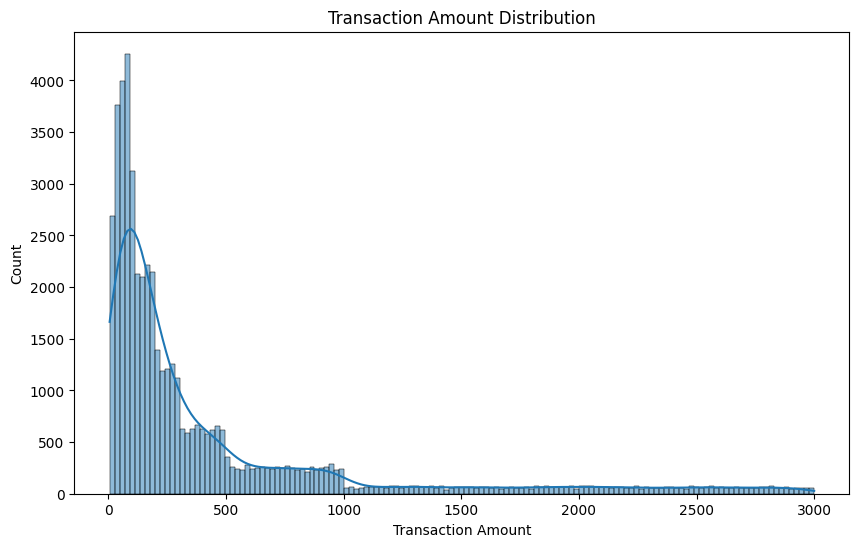

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Transaction Amount', kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

Gender
M    25950
F    24050
Name: count, dtype: int64


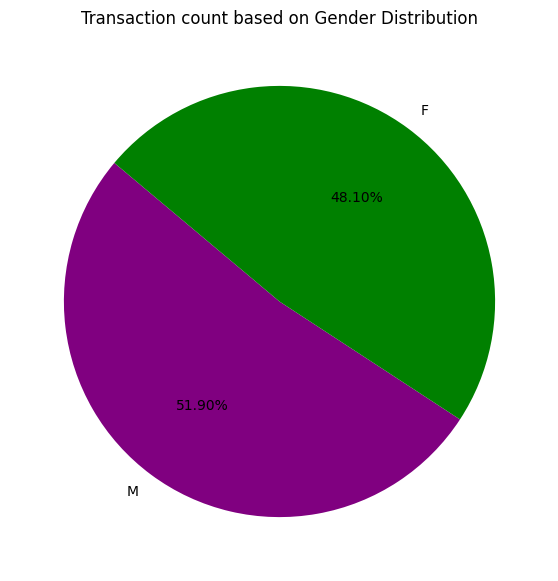

In [33]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(7,7))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.2f%%',startangle=140,colors=('purple','green'))
plt.title("Transaction count based on Gender Distribution")
plt.show()

In [47]:
dataframe_plotly = df.groupby(['Category','Gender']).size().reset_index(name='Count')

fig = px.bar(
    dataframe_plotly, x='Category', y='Count', color='Gender', barmode='group',
    labels={'Count': 'Transaction Count'},
    title="Transaction Breakdown by Category with Gender Distribution",
    text='Count')  
fig.update_traces(texttemplate='%{text}', textposition='outside')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Gender=F<br>Category=%{x}<br>Transaction Count=%{text}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'text': array([3663., 3824., 4273., 3866., 3833., 4591.]),
              'textposition': 'outside',
              'texttemplate': '%{text}',
              'type': 'bar',
              'x': array(['Clothing', 'Cosmetic', 'Electronics', 'Market', 'Restaurant', 'Travel'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([3663, 3824, 4273, 3866, 3833, 4591]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Gender=M<br>Category=%{x}<br>Transaction Count=%{text}<extra></extra>',
              'legendgroup': 'M',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'M',
              'offsetgroup': 'M',
              'orientation': 'v',
              'showlegend': True,
              'text': array([4598., 4419., 4051., 4516., 4580., 3786.]),
              'textposition': 'outside',
              'texttemplate': '%{text}',
              'type': 'bar',
              'x': array(['Clothing', 'Cosmetic', 'Electronics', 'Market', 'Restaurant', 'Travel'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([4598, 4419, 4051, 4516, 4580, 3786]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'Gender'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Transaction Breakdown by Category with Gender Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Category'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Transaction Count'}}}
})

In [50]:
dataframe_transactions_plotly = df.groupby(['Category', 'Gender'])['Transaction Amount'].sum().reset_index()
dataframe_transactions_plotly['Count'] = df.groupby(['Category', 'Gender']).size().values

fig = px.bar(dataframe_transactions_plotly, x='Category', y='Count', color='Gender', barmode='group',
             labels={'Transaction Amount': 'Total Transaction Amount'},
             title="Transaction Amount Breakdown by Category with Transaction Count",
             text='Transaction Amount')  # Display the count on hover

fig.update_traces(texttemplate='%{text}', textposition='outside')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Gender=F<br>Category=%{x}<br>C' ... ' Amount=%{text}<extra></extra>'),
              'legendgroup': 'F',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'showlegend': True,
              'text': array([ 587938.88,  407487.58, 2323346.27, 1019779.52,  211185.65, 7219647.84]),
              'textposition': 'outside',
              'texttemplate': '%{text}',
              'type': 'bar',
              'x': array(['Clothing', 'Cosmetic', 'Electronics', 'Market', 'Restaurant', 'Travel'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([3663, 3824, 4273, 3866, 3833, 4591]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Gender=M<br>Category=%{x}<br>C' ... ' Amount=%{text}<extra></extra>'),
              'legendgroup': 'M',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'M',
              'offsetgroup': 'M',
              'orientation': 'v',
              'showlegend': True,
              'text': array([ 731403.59,  469184.86, 2070745.83, 1131354.9 ,  253302.95, 5680584.1 ]),
              'textposition': 'outside',
              'texttemplate': '%{text}',
              'type': 'bar',
              'x': array(['Clothing', 'Cosmetic', 'Electronics', 'Market', 'Restaurant', 'Travel'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([4598, 4419, 4051, 4516, 4580, 3786]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'Gender'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Transaction Amount Breakdown by Category with Transaction Count'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Category'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}}}
})

In [51]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Transaction count by month
monthly_transaction_amount = df.groupby('Month')['Transaction Amount'].sum().reset_index()

fig = px.line(monthly_transaction_amount, x='Month', y='Transaction Amount', title="Total Transaction Amount by Month")
fig.update_traces(mode='lines+markers', hovertext=monthly_transaction_amount['Transaction Amount'])

# Customize hover information
fig.update_layout(hovermode='x unified', hoverlabel=dict(namelength=0))



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Month=%{x}<br>Transaction Amount=%{y}<extra></extra>',
              'hovertext': array([2345228.21, 2148030.95, 2396963.31, 2289731.3 , 2460816.56, 2254592.41,
                                  2475041.53, 2391450.2 , 2274245.66, 1069861.84]),
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
              'xaxis': 'x',
              'y': array([2345228.21, 2148030.95, 2396963.31, 2289731.3 , 2460816.56, 2254592.41,
                          2475041.53, 2391450.2 , 2274245.66, 1069861.84]),
              'yaxis': 'y'}],
    'layout': {'hoverlabel': {'namelength': 0},
               'hovermode': 'x unified',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Total Transaction Amount by Month'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Month'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Transaction Amount'}}}
})